In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
datos = pd.read_csv('NFLX.csv')

In [4]:
datos.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [ ]:
datos[5:]

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Return,Year
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,NaN,2018
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,4.507200,2018
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,-0.436551,2018
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,-5.465676,2018
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,-0.251901,2018


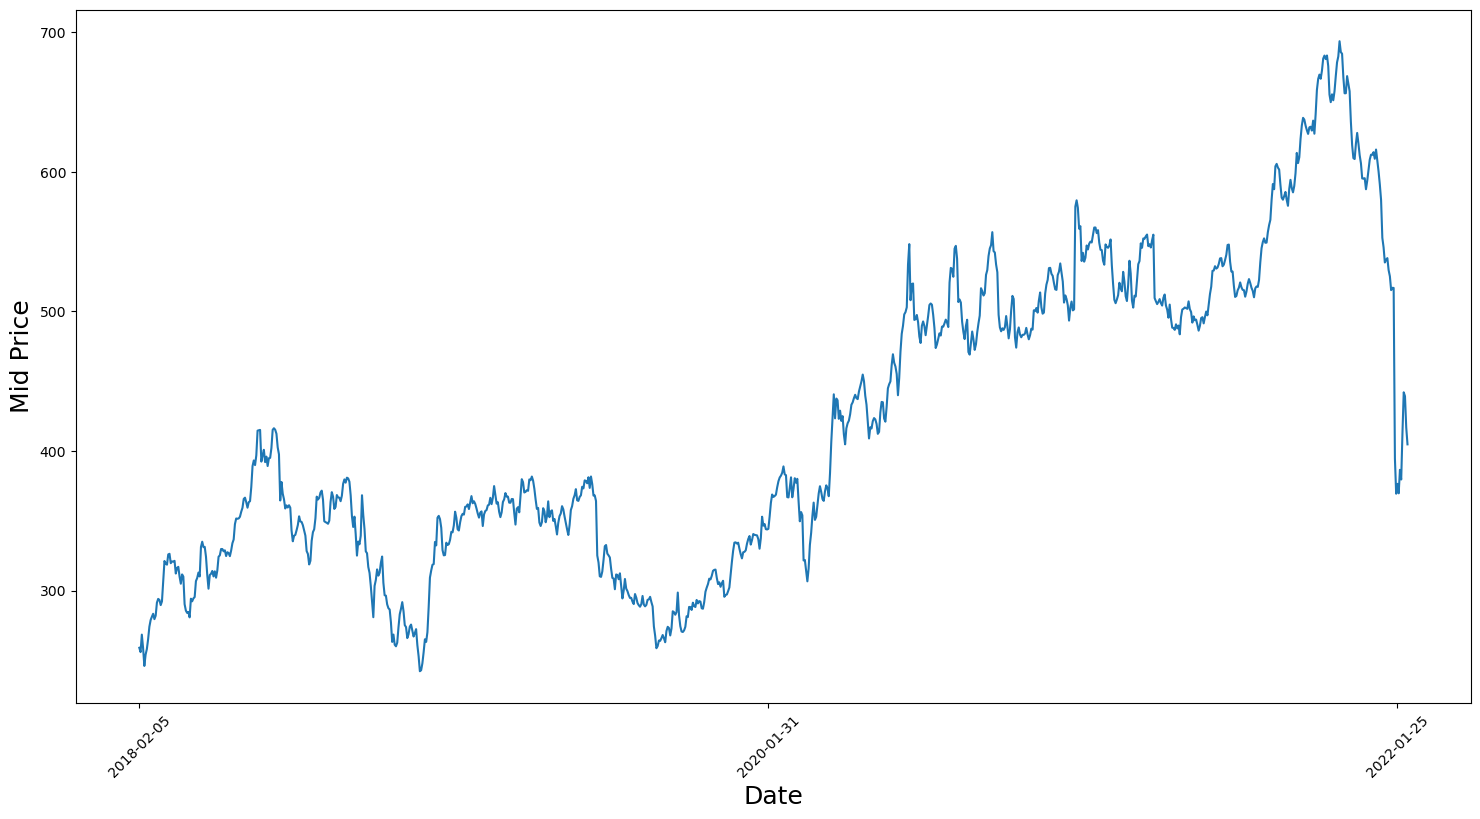

In [7]:
plt.figure(figsize = (18,9))
plt.plot(range(datos.shape[0]),(datos['Low']+datos['High'])/2.0)
plt.xticks(range(0,datos.shape[0],500),datos['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [11]:
datos.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

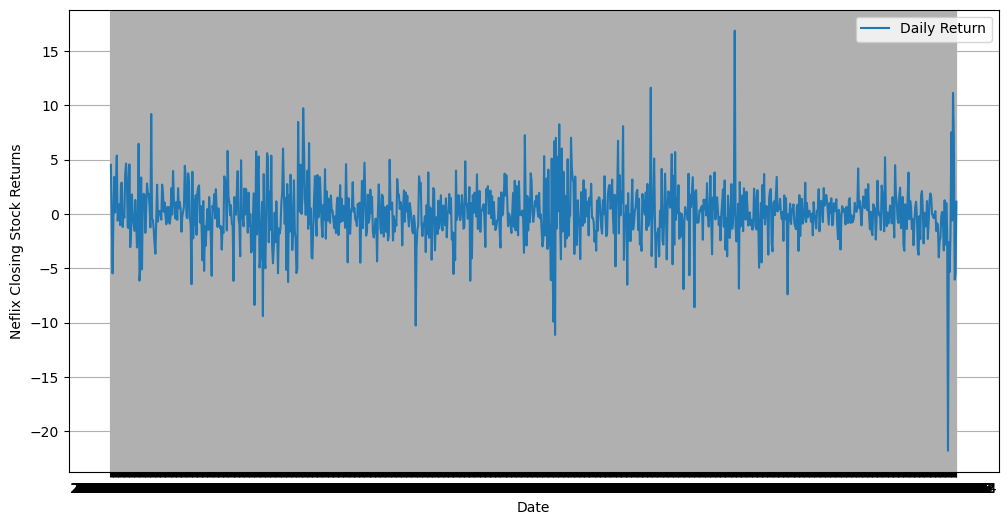

In [14]:
datos["Daily_Return"] = datos["Adj Close"].pct_change() * 100
plt.figure(figsize=(12, 6))
plt.plot(datos['Date'], datos["Daily_Return"], label= "Daily Return")
plt.xlabel('Date')
plt.ylabel('Neflix Closing Stock Returns')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
datos["Date"] = pd.to_datetime(datos["Date"])  # Convert Date column to datetime format
datos = datos.sort_values(by="Date")  # Ensure chronological order
datos.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Return
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,NaN
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,4.507200
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,-0.436551
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,-5.465676
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,-0.251901


C:\Users\Usuario\AppData\Local\Temp\ipykernel_25088\2306571138.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=datos["Year"], y=datos["Adj Close"], palette="coolwarm")


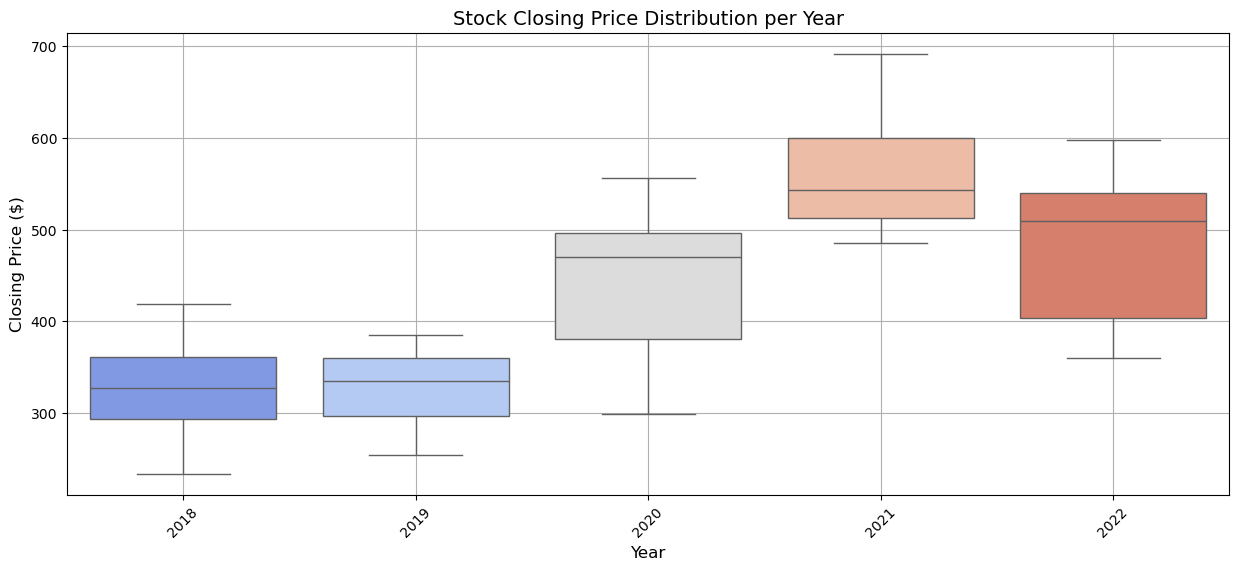

In [23]:
import seaborn as sns
# Extract Year from Date
datos["Year"] = datos["Date"].dt.year
# Plot Box Plot
plt.figure(figsize=(15, 6))
sns.boxplot(x=datos["Year"], y=datos["Adj Close"], palette="coolwarm")
# Labels & Formatting
plt.title("Stock Closing Price Distribution per Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Closing Price ($)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

In [29]:
datos_n = datos[['Open', 'Close']]
print(datos_n)

            Open       Close
0     262.000000  254.259995
1     247.699997  265.720001
2     266.579987  264.559998
3     267.079987  250.100006
4     253.850006  249.470001
...          ...         ...
1004  401.970001  427.140015
1005  432.959991  457.130005
1006  448.250000  429.480011
1007  421.440002  405.600006
1008  407.309998  410.170013

[1009 rows x 2 columns]


C:\Users\Usuario\AppData\Local\Temp\ipykernel_25088\2401343961.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fg.show()


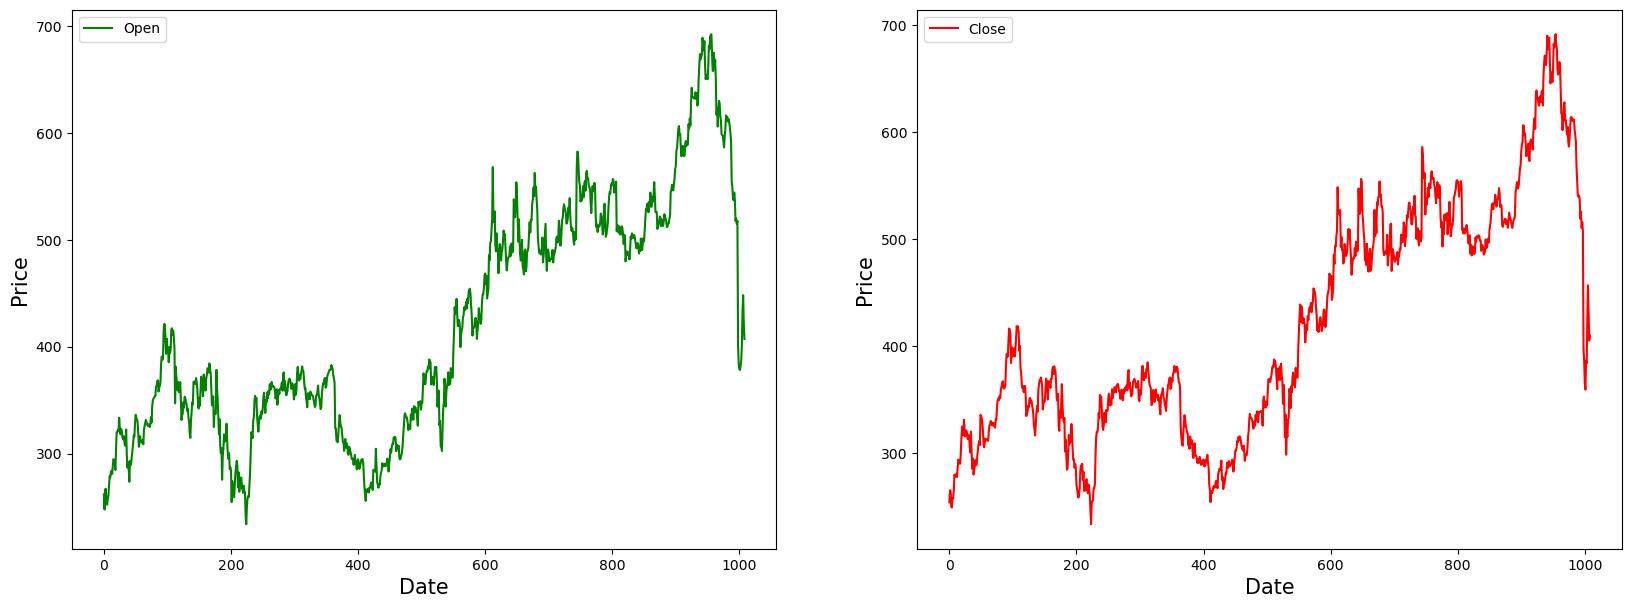

In [30]:
fg, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(datos_n['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(datos_n['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fg.show()

In [31]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
datos_n[datos_n.columns] = MMS.fit_transform(datos_n)
datos_n

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25088\3131612292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_n[datos_n.columns] = MMS.fit_transform(datos_n)


,Open,Close
0,0.061253,0.044516
1,0.030059,0.069548
2,0.071243,0.067015
3,0.072334,0.035430
4,0.043474,0.034053
...,...,...
1004,0.366577,0.422140
1005,0.434178,0.487648
1006,0.467531,0.427251
1007,0.409048,0.375090


In [32]:
training_size = round(len(datos_n) * 0.80) # Selecting 80 % for training and 20 % for testing
training_size

807

In [33]:
train_data = datos_n[:training_size]
test_data  = datos_n[training_size:]

train_data.shape, test_data.shape

((807, 2), (202, 2))

In [36]:
def create_sequence(dataset):
                sequences = []
                labels = []
                start_idx = 0
                for stop_idx in range(50,len(dataset)):                   # Selecting 50 rows at a time
                    sequences.append(dataset.iloc[start_idx:stop_idx])
                    labels.append(dataset.iloc[stop_idx])
                    start_idx += 1
                return (np.array(sequences),np.array(labels))

In [37]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [38]:
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((757, 50, 2), (757, 2), (152, 50, 2), (152, 2))

In [75]:
# Modelo LSTM
model = Sequential([
    LSTM(100, input_shape=(train_seq.shape[1], train_seq.shape[2]), return_sequences=True),  #return_sequences=True Devuelve salidas para cada paso (necesario para apilar LSTM)
    Dropout(0.2), #evita el sobreajuste , apaga aleatoriamete el 20% de las neuronas durante el entrenamiento#
    LSTM(100, return_sequences=False), #return sequences = False nos da la salid final y no toda la secuencia
    Dense(1) #capa final densa
])
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

model.summary()

c:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 50, 100)        │        41,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 50, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,701 (475.39 KB)

 Trainable params: 121,701 (475.39 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
model.fit(train_seq, train_label, epochs=40,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 143ms/step - loss: 0.3365 - val_loss: 0.0317
Epoch 2/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 185ms/step - loss: 0.0064 - val_loss: 0.0061
Epoch 3/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step - loss: 0.0027 - val_loss: 0.0061
Epoch 4/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - loss: 0.0018 - val_loss: 0.0047
Epoch 5/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - loss: 0.0019 - val_loss: 0.0045
Epoch 6/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 149ms/step - loss: 0.0018 - val_loss: 0.0046
Epoch 7/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0019 - val_loss: 0.0040
Epoch 8/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0016 - val_loss: 0.0040
Epoch 9/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.0017 - val_loss: 0.0039
Epoch 10/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0016 - val_loss: 0.0036
Epoch 11/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - loss: 0.0016 - val_loss: 0.0035
Epoch 12/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step -

In [78]:
model1 = Sequential()
model1.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model1.add(Dropout(0.2)) 
model1.add(LSTM(units=50))

model1.add(Dense(2))

model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model1.summary()

c:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 50, 50)         │        10,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,902 (120.71 KB)

 Trainable params: 30,902 (120.71 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
model1.fit(train_seq, train_label, epochs=40,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 108ms/step - loss: 0.0726 - mean_absolute_error: 0.2117 - val_loss: 0.0382 - val_mean_absolute_error: 0.1741
Epoch 2/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 0.0061 - mean_absolute_error: 0.0609 - val_loss: 0.0098 - val_mean_absolute_error: 0.0750
Epoch 3/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.0027 - mean_absolute_error: 0.0398 - val_loss: 0.0081 - val_mean_absolute_error: 0.0611
Epoch 4/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0024 - mean_absolute_error: 0.0372 - val_loss: 0.0086 - val_mean_absolute_error: 0.0624
Epoch 5/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0021 - mean_absolute_error: 0.0353 - val_loss: 0.0072 - val_mean_absolute_error: 0.0576
Epoch 6/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0022 - mean_absolute_error: 0.0357 - val_loss: 0.0068 - val_mean_absolute_error: 0.0587
Epoch 7/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0023 - mean_absolute_error: 0.0367 - val_lo

In [80]:
test_predicted1 = model1.predict(test_seq)
test_predicted1[:5]

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 226ms/step


array([[0.64944965, 0.6543003 ],
       [0.6535783 , 0.6588707 ],
       [0.6570151 , 0.6627067 ],
       [0.6607005 , 0.6668203 ],
       [0.66406834, 0.67037153]], dtype=float32)

In [ ]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

3/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step WARNING:tensorflow:5 out of the last 16 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000017D7188BE20> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step


array([[0.6860772 ],
       [0.6846262 ],
       [0.6917652 ],
       [0.70250946],
       [0.70812786]], dtype=float32)

In [82]:
test_predicted = np.resize(test_predicted, (152, 2))
test_predicted.shape

(152, 2)

In [66]:
test_predicted_inverse = MMS.inverse_transform(test_predicted)
test_predicted_inverse[:5]

array([[534.4204 , 536.84406],
       [538.22205, 542.9907 ],
       [541.07227, 535.6785 ],
       [540.53815, 541.562  ],
       [543.80176, 550.1679 ]], dtype=float32)

In [83]:
test_predicted_inverse1 = MMS.inverse_transform(test_predicted1)
test_predicted_inverse1[:5]

array([[531.64716, 533.4252 ],
       [533.53986, 535.51764],
       [535.1154 , 537.27374],
       [536.8049 , 539.15704],
       [538.3488 , 540.78284]], dtype=float32)

In [68]:
gs_slic_data = pd.concat([datos_n.iloc[-152:].copy(),pd.DataFrame(test_predicted_inverse,columns=['open_predicted','close_predicted'],index=datos_n.iloc[-152:].index)], axis=1)

In [92]:
gs_slic_data[['open','close']] = MMS.inverse_transform(gs_slic_data[['Open','Close']])
gs_slic_data

,Open,Close,open_predicted,close_predicted,open,close
857,0.636520,0.654551,534.420410,536.844055,525.719971,533.539978
858,0.657854,0.655512,538.222046,542.990723,535.500000,533.979980
859,0.652401,0.672244,541.072266,535.678528,533.000000,541.640015
860,0.676919,0.659837,540.538147,541.562012,544.239990,535.960022
861,0.647885,0.648479,543.801758,550.167908,530.929993,530.760010
...,...,...,...,...,...,...
1004,0.366577,0.422140,438.544189,410.710449,401.970001,427.140015
1005,0.434178,0.487648,394.476440,384.195526,432.959991,457.130005
1006,0.467531,0.427251,405.985931,411.118713,448.250000,429.480011
1007,0.409048,0.375090,443.475830,472.606049,421.440002,405.600006


In [99]:

gs_slic_data1 = pd.concat([datos_n.iloc[-152:].copy(),pd.DataFrame(test_predicted_inverse1,columns=['open_predicted1','close_predicted1'],index=datos_n.iloc[-152:].index)], axis=1)
gs_slic_data1[['open','close']] = MMS.inverse_transform(gs_slic_data1[['Open','Close']])

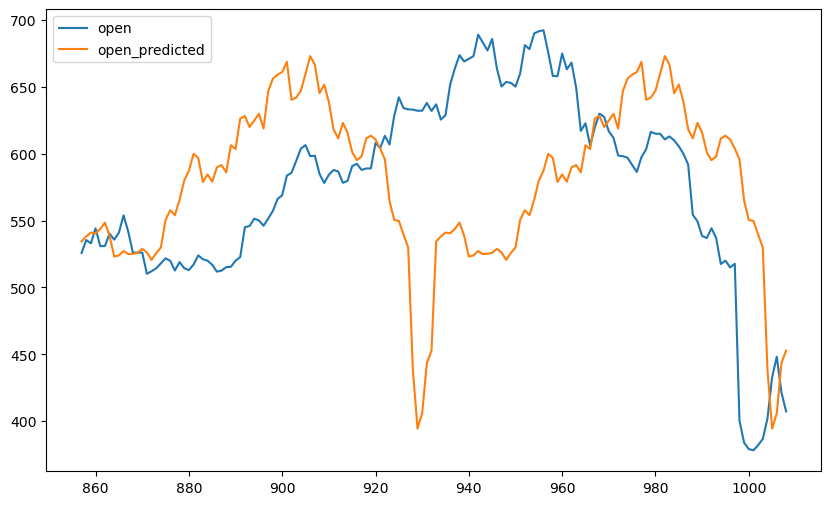

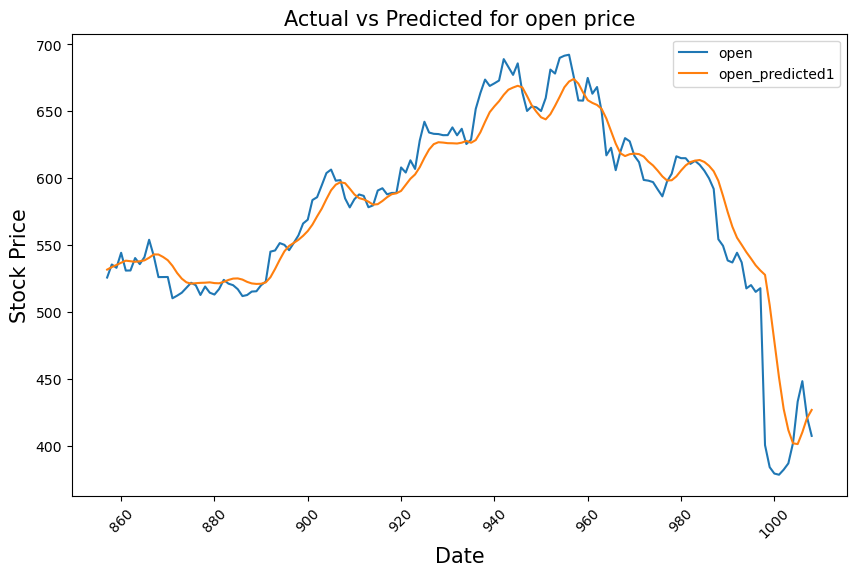

In [100]:
gs_slic_data[['open','open_predicted']].plot(figsize=(10,6))
gs_slic_data1[['open','open_predicted1']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

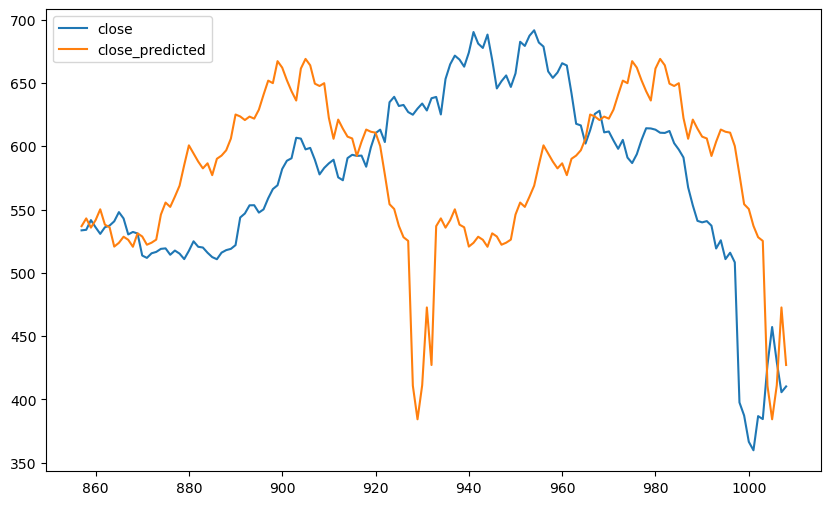

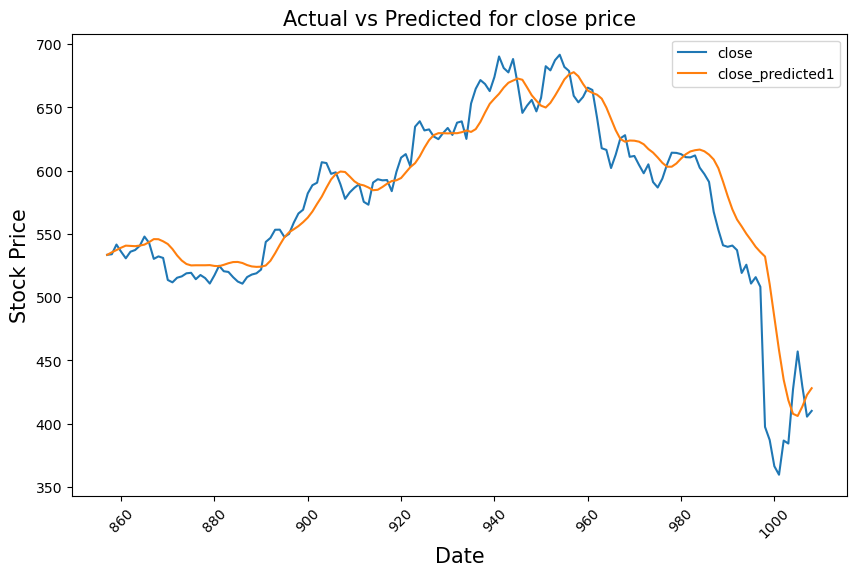

In [102]:
gs_slic_data[['close','close_predicted']].plot(figsize=(10,6))
gs_slic_data1[['close','close_predicted1']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()